<a href="https://colab.research.google.com/github/alesouzaeu/Python_estudo/blob/master/Udemy/Detector_de_Emo%C3%A7%C3%B5es/Testes_com_o_Detector_de_Emo%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testando o modelo do Detector de Emoções

## Etapa 1 - Importando as bibliotecas

In [ ]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import zipfile

In [ ]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [ ]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
tensorflow.__version__

'2.0.0'

## Etapa 2 - Conectando com o Drive e acessando os arquivos

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/My Drive/Material.zip"
zip_object = zipfile.ZipFile(file = path, mode = "r")
zip_object.extractall('./')
zip_object.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/gdrive/My Drive/Material.zip' mode='r'>>

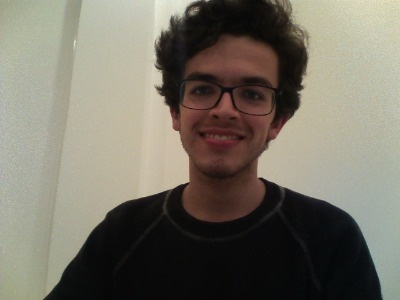

In [ ]:
imagem = cv2.imread('Material/testes/teste_gabriel.png')
cv2_imshow(imagem)

In [ ]:
imagem.shape

(300, 400, 3)

## Testando o Detector

### Carregamento dos modelos

In [ ]:
cascade_faces = "Material/haarcascade_frontalface_default.xml"
caminho_modelo = "Material/modelo_01_expressoes.h5"
face_detection = cv2.CascadeClassifier(cascade_faces)
classificador_emocoes = load_model(caminho_modelo, compile = False)
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]

### Detecção de faces

In [ ]:
original = imagem.copy()
faces = face_detection.detectMultiScale(original, scaleFactor = 1.1,
                                        minNeighbors = 3, minSize = (20,20))

In [ ]:
faces

array([[162,  40, 128, 128]], dtype=int32)

In [ ]:
len(faces)

1

In [ ]:
faces.shape

(1, 4)

### Extração do ROI (region of interest)

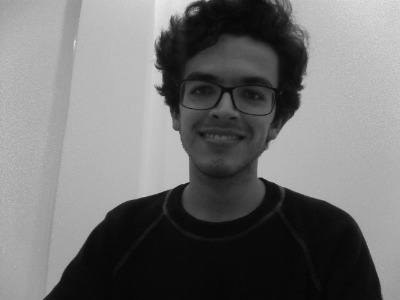

In [ ]:
cinza = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
cv2_imshow(cinza)

In [ ]:
cinza.shape

(300, 400)

In [ ]:
roi = cinza[40:40 + 128, 162:162 + 128]

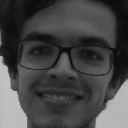

In [ ]:
cv2_imshow(roi)

In [ ]:
roi.shape

(128, 128)

In [ ]:
roi

array([[ 39,  37,  28, ...,  25,  29,  34],
       [ 34,  32,  25, ...,  24,  24,  29],
       [ 31,  33,  30, ...,  23,  22,  26],
       ...,
       [184, 185, 186, ..., 180, 181, 181],
       [184, 185, 186, ..., 179, 181, 180],
       [184, 185, 187, ..., 180, 181, 180]], dtype=uint8)

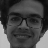

In [ ]:
roi = cv2.resize(roi, (48, 48))
cv2_imshow(roi)

In [ ]:
roi.dtype

dtype('uint8')

In [ ]:
roi = roi.astype('float')
roi.dtype

dtype('float64')

In [ ]:
roi

array([[ 33.,  29.,  38., ...,  16.,  22.,  25.],
       [ 32.,  37.,  37., ...,  16.,  20.,  25.],
       [ 32.,  36.,  31., ...,  17.,  21.,  25.],
       ...,
       [186., 189., 189., ..., 181., 181., 180.],
       [185., 188., 189., ..., 180., 181., 180.],
       [185., 188., 188., ..., 179., 180., 181.]])

In [ ]:
roi = roi / 255

In [ ]:
roi

array([[0.12941176, 0.11372549, 0.14901961, ..., 0.0627451 , 0.08627451,
        0.09803922],
       [0.1254902 , 0.14509804, 0.14509804, ..., 0.0627451 , 0.07843137,
        0.09803922],
       [0.1254902 , 0.14117647, 0.12156863, ..., 0.06666667, 0.08235294,
        0.09803922],
       ...,
       [0.72941176, 0.74117647, 0.74117647, ..., 0.70980392, 0.70980392,
        0.70588235],
       [0.7254902 , 0.7372549 , 0.74117647, ..., 0.70588235, 0.70980392,
        0.70588235],
       [0.7254902 , 0.7372549 , 0.7372549 , ..., 0.70196078, 0.70588235,
        0.70980392]])

In [ ]:
roi = img_to_array(roi)

In [ ]:
roi

array([[[0.12941177],
        [0.11372549],
        [0.14901961],
        ...,
        [0.0627451 ],
        [0.08627451],
        [0.09803922]],

       [[0.1254902 ],
        [0.14509805],
        [0.14509805],
        ...,
        [0.0627451 ],
        [0.07843138],
        [0.09803922]],

       [[0.1254902 ],
        [0.14117648],
        [0.12156863],
        ...,
        [0.06666667],
        [0.08235294],
        [0.09803922]],

       ...,

       [[0.7294118 ],
        [0.7411765 ],
        [0.7411765 ],
        ...,
        [0.70980394],
        [0.70980394],
        [0.7058824 ]],

       [[0.7254902 ],
        [0.7372549 ],
        [0.7411765 ],
        ...,
        [0.7058824 ],
        [0.70980394],
        [0.7058824 ]],

       [[0.7254902 ],
        [0.7372549 ],
        [0.7372549 ],
        ...,
        [0.7019608 ],
        [0.7058824 ],
        [0.70980394]]], dtype=float32)

In [ ]:
roi.shape

(48, 48, 1)

In [ ]:
roi = np.expand_dims(roi, axis = 0)

In [ ]:
roi.shape

(1, 48, 48, 1)

### Previsões

In [ ]:
preds = classificador_emocoes.predict(roi)[0]

In [ ]:
preds

array([1.6802111e-05, 5.7679777e-09, 1.1206568e-05, 9.9066460e-01,
       1.8033772e-05, 1.8518280e-05, 9.2708217e-03], dtype=float32)

In [ ]:
len(preds)

7

In [ ]:
emotion_probability = np.max(preds)
emotion_probability

0.9906646

In [ ]:
preds.argmax()

3

In [ ]:
label = expressoes[preds.argmax()]
label

'Feliz'

### Resultados

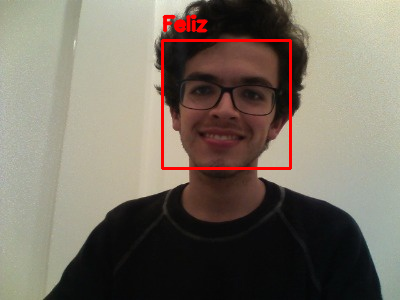

In [ ]:
cv2.putText(original, label, (162, 40 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
            (0, 0, 255), 2, cv2.LINE_AA)
cv2.rectangle(original, (162, 40), (162 + 128, 40 + 128), (0, 0, 255), 2)
cv2_imshow(original)

In [ ]:
probabilidades = np.ones((250,300,3), dtype= 'uint8') * 255
probabilidades

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
probabilidades.shape

(250, 300, 3)

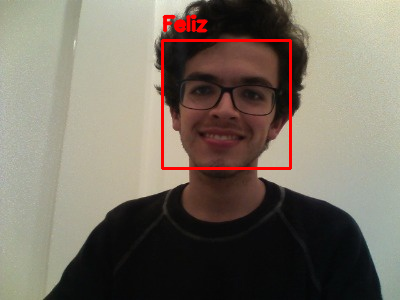

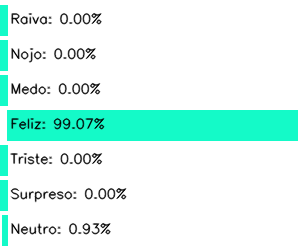

In [ ]:
cv2_imshow(original)
if len(faces) == 1:
  for (i, (emotion, prob)) in enumerate(zip(expressoes, preds)):
    #print(i, emotion, prob)
    text = "{}: {:.2f}%".format(emotion, prob * 100)
    w = int(prob * 300)
    cv2.rectangle(probabilidades, (7, (i * 35) + 5), (w, (i * 35) + 35), (200, 250, 20), -1)
    cv2.putText(probabilidades, text, (10, (i * 35) + 23), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 1, cv2.LINE_AA)
cv2_imshow(probabilidades)